# Ví dụ 3. (Bài tập 1) 
Trong tệp dữ liệu SAT_GPA.csv đính kèm có 84 mẫu dữ liệu điểm thi của các sinh  viên,  mẫu  có  02  trường  dữ  liệu,  trong  cột  thứ  nhất  chứa  trường  điểm  SAT  (Reading + Mathematic + Writing) của các kỳ thi trong bậc phổ thông; cột thứ hai chứa điểm trung bình GPA của sinh viên tương ứng ở bậc học đại học/cao đẳng. Chúng ta xây dựng một mô hình hồi quy tuyến tính để mô tả sự phụ thuộc của điểm GPA ở bậc đại học/cao đẳng vào điểm SAT của mỗi sinh viên ở bậc phổ thông. Trong ví dụ này, chúng ta có thể sử dụng thư viện panda để đọc tệp csv, hoặc sử dụng đoạn code đọc tệp văn bản như ví dụ trước. 

## Đọc dữ liệu thông qua Pandas

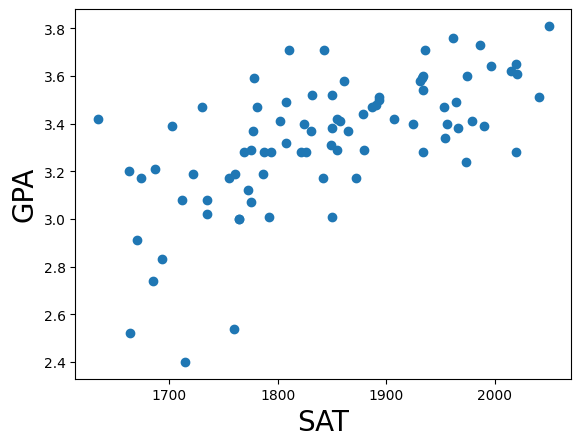

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
 
# Change to data path on your computer 
data = pd.read_csv("data/SAT_GPA.csv") 
# Show the description of data 
data.describe() 
 
# Set to training data (x, y) 
y = data['GPA'] 
x = data['SAT'] 
 
# Remind that we need to put component x_0 = 1 to x 
plt.scatter(x,y) 
plt.xlabel('SAT', fontsize = 20) 
plt.ylabel('GPA', fontsize = 20) 
plt.show() 

## Chia dữ liệu thành phần training với 60 mẫu đầu và validation với các mẫu còn lại

In [2]:
x_train, y_train = x[:60], y[:60]
x_valid, y_valid = x[60:], y[60:]

x_train = np.asarray(x_train)
y_train = np.asarray(y_train)
x_valid = np.asarray(x_valid)
y_valid = np.asarray(y_valid)

## Lập công thức hồi quy tuyến tính ứng với dữ liệu training nói trên. Hiển thị đồ thị của đường hồi quy với các điểm dữ liệu đã vẽ ở phần code đã cho.

### Cách 1. Tính tay trực tiếp 

In [3]:
# Building Xbar  
one = np.ones((x_train.shape[0], 1)) 
Xbar = np.concatenate((one, x_train.reshape(-1, 1)), axis = 1) # reshape x_train to 2 dim as one 
 
# Calculating weights of the fitting line  
A = np.dot(Xbar.T, Xbar) 
b = np.dot(Xbar.T, y_train) 
w = np.dot(np.linalg.pinv(A), b) 
print('w = ', w) 

w =  [0.88948508 0.0012857 ]


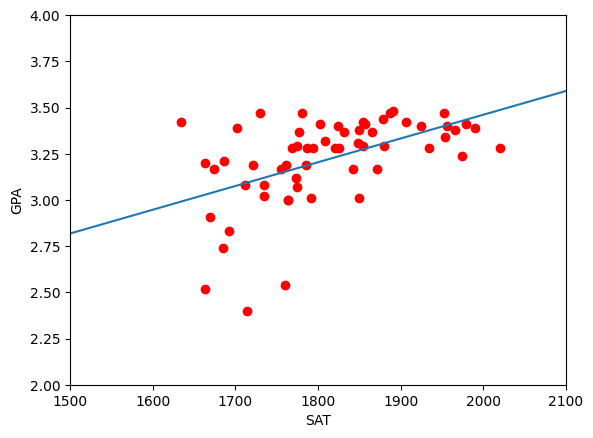

In [4]:
# Preparing the fitting line  
w_0 = w[0] 
w_1 = w[1]
x0 = np.linspace(1500, 2100, 2) 
y0 = w_0 + w_1*x0 
 
# Drawing the fitting line  
plt.plot(x_train.T, y_train.T, 'ro')       # data  
plt.plot(x0, y0)               # the fitting line 
plt.axis([1500, 2100, 2, 4]) 
plt.xlabel('SAT') 
plt.ylabel('GPA') 
plt.show()

### Cách 2. Sử dụng thư viện

In [5]:
from sklearn import datasets, linear_model 
# Load training data here and assign to Xbar (obs. Data) and y (label) 
# fit the model by Linear Regression 
regr = linear_model.LinearRegression(fit_intercept=False)  
# fit_intercept = False for calculating the bias 
# Building Xbar  
regr.fit(x_train.reshape(-1, 1), y_train.reshape(-1, 1)) 
print('Coef:', regr.coef_)
print('Intercept:', regr.intercept_)

Coef: [[0.0017752]]
Intercept: 0.0


## Chạy thử thư viện với dữ liệu validate. Tính tổng bình phương sai số

Tính tổng bình phương sai số

In [6]:
y_hat = w_0 + w_1 * x_valid
sum_square_error = 0
for i in range(len(y_hat)):
    sum_square_error += (y_hat[i] - y_valid[i]) ** 2
print('Sum square error is:', sum_square_error)

Sum square error is: 1.6786863439754525


Vẽ đường thẳng hồi quy (với cả tập train và tập valid)

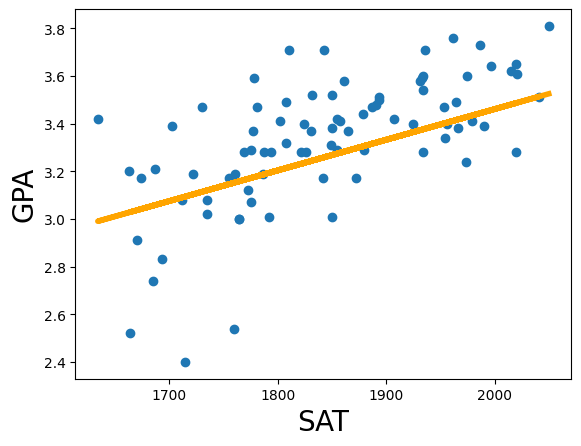

In [7]:
plt.scatter(x, y)
y_all_hat = w_1 * x + w_0 
fig = plt.plot(x, y_all_hat, lw=4, c='orange', label='regression line')
plt.xlabel('SAT', fontsize=20)
plt.ylabel('GPA', fontsize=20)
plt.show()

# Ví dụ 4. (Bài tập 2).  
  
Trong y sinh học, bề dày lớp nội trung mạc (NTM) phản ánh một số bệnh lý của cơ thể. Thực tế hiện tượng dày lớp NTM động mạch cảnh do nhiều yếu tố như di truyền, chủng tộc, mắc bệnh tim mạch, tuổi, giới, BMI, tăng huyết áp, đái tháo đường.... cùng tác động. Trong ví dụ này ta không đề cập các yếu tố di truyền, chủng tộc, giới, mắc bệnh tim mạch... mà chỉ lưu ý đến các biến số như: tuổi, cholesterol, glucose, huyết áp tâm thu và BMI tác động lên độ dày NTM.  
  
Hãy dùng dữ liệu cho trong tệp vidu4_lin_reg.txt (tệp văn bản) để xây dựng mô hình hồi quy tuyến tính cho thấy sự phụ thuộc của bề dày lớp NTM theo các biến số khác. Tham khảo phần đọc dữ liệu từ tệp văn bản đã có trong ví dụ trước. Các trường dữ liệu gồm:  

|Thuộc tính|Mô tả|
|-|-|
|ID | Mã bệnh nhân|
|TUOI | Tuổi|
|BIM | chỉ số khối lượng cơ thể (Body Mass Index)|
|HA | huyến áp tâm thu|
|GLUCOSE | đường huyết|
|CHOLESTEROL | độ Cholesterol trong máu|
|BEDAYNTM | độ dày NT|
  
Mô hình cần xây dựng có dạng: 
$Bề dày NTM= \beta_0 + \beta_1(tuổi) + \beta_2(cholesterol) + \beta_3(glucose) + \beta_4(huyết áp TT) + \beta_5(BMI)$

## a) Xác định các hệ số với 100 dữ liệu đã cho

In [8]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
 
# Change to data path on your computer 
data = pd.read_csv("data/health_infor.txt", sep=' ') 
# Show the description of data 
data.describe() 

,ID,TUOI,BMI,HA,GLUCOSE,CHOLESTEROL,BEDAYNTM
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,50.500000,62.690000,22.360000,141.000000,6.843000,5.199200,1.071000
std,29.011492,15.519746,3.394946,20.275875,4.274927,1.420606,0.403821
min,1.000000,21.000000,15.000000,90.000000,2.700000,2.000000,0.560000
25%,25.750000,54.000000,20.000000,130.000000,4.600000,4.187500,0.810000
50%,50.500000,63.500000,22.000000,140.000000,5.550000,5.195000,0.970000
75%,75.250000,74.000000,24.000000,160.000000,6.825000,6.415000,1.135000
max,100.000000,95.000000,34.000000,190.000000,26.000000,8.180000,2.700000


In [9]:
print(data) 

     ID  TUOI  BMI   HA  GLUCOSE  CHOLESTEROL  BEDAYNTM
0     1    56   21  160     14.0         6.00      1.95
1     2    76   18  150     12.0         4.97      1.33
2     3    63   16  160      4.4         6.39      0.83
3     4    78   20  100      4.0         7.00      2.00
4     5    87   20  110      4.6         4.10      1.30
..  ...   ...  ...  ...      ...          ...       ...
95   96    55   24  160      5.0         7.20      0.90
96   97    76   15  140      3.1         5.24      1.16
97   98    70   25  180      4.0         4.40      1.00
98   99    85   21  160      5.2         5.20      0.97
99  100    87   22  130      9.0         5.20      2.30

[100 rows x 7 columns]


In [10]:
# Set to training data (x, y) 
x = data[['TUOI', 'BMI', 'HA', 'GLUCOSE', 'CHOLESTEROL']]
y = data['BEDAYNTM']

x = np.asarray(x).reshape(-1, 5)
y = np.asarray(y).reshape(-1, 1)

In [11]:
print(len(x), len(y))

100 100


In [12]:
from sklearn import datasets, linear_model 
# Load training data here and assign to Xbar (obs. Data) and y (label) 
# fit the model by Linear Regression 
regr = linear_model.LinearRegression(fit_intercept=False)  
# fit_intercept = False for calculating the bias 
regr.fit(x, y) 

LinearRegression(fit_intercept=False)

In [13]:
# Lấy các hệ số của mô hình
coefficients = regr.coef_

# Lấy intercept của mô hình
intercept = regr.intercept_

In [14]:
print('Phuong trinh hoi quy tuyen tinh la:', intercept, coefficients)

Phuong trinh hoi quy tuyen tinh la: 0.0 [[ 0.00967574 -0.0019883   0.0018536   0.00742978  0.03801766]]


## b) Chia dữ liệu thành: first 80-th for train, others (20) for test. Tính lại hệ số. Chạy thử trên tập test. Tính kỳ vọng, phương sai của sai số 

In [15]:
x_train, y_train = x[:80], y[:80]
x_test, y_test = x[80:], y[80:]

regr.fit(x_train, y_train)

LinearRegression(fit_intercept=False)

In [16]:
# Lấy các hệ số của mô hình
coef = regr.coef_

# Lấy intercept của mô hình
inter = regr.intercept_

print('Phuong trinh hoi quy tuyen tinh moi la:', inter, coef)

Phuong trinh hoi quy tuyen tinh moi la: 0.0 [[0.00910545 0.00019664 0.00273469 0.00819589 0.00722038]]


In [17]:
# Viết ra phương trình hồi quy tuyến tính 
equal = lambda x: inter + coef[0][0] * x[0] + coef[0][1] * x[1] + coef[0][2] * x[2] + coef[0][3] * x[3] + coef[0][4] * x[4]

# Tính y dự đoán trên tập test 
y_hat = []
for row in x_test:
    # result = inter + coef[0][0] * row[0] + coef[0][1] * row[1] + coef[0][2] * row[2] + coef[0][3] * row[3] + coef[0][4] * row[4]
    result = equal(row)
    y_hat.append(result)

# Tính sai số của các dự đoán 
error = y_test - y_hat

In [18]:
import numpy as np

# Tính kỳ vọng và phương sai 
np_array = np.array(error)
mean = np.mean(np_array)
variance = np.var(np_array)

# Print kết quả 
print('Kỳ vọng của sai số:', mean, '\nPhương sai của sai số:', variance)

Kỳ vọng của sai số: 0.08131646292492084 
Phương sai của sai số: 0.3200390642079772


# Ví dụ 5. (Bài tập 3)  
  
Trong tệp dữ liệu real_estate.csv đính kèm chứa thông tin các giao dịch mua bán bất động sản. Chúng ta có 414 mẫu dữ liệu, mỗi bản ghi có 8 cột theo thứ tự là:  
  
• Cột x1: Số thứ tự (chúng ta sẽ bỏ qua trường này)  
• Cột x2: Ngày giao dịch mua bán (ta chỉ lấy phần nguyên là năm)  
• Cột x3: Tuổi của căn nhà (theo năm)  
• Cột x4: Khoảng cách tới ga MRT (phương tiện công cộng nội đô) gần nhất    
• Cột x5: Số cửa hàng tiện ích gần đó  
• Cột x6: Kinh độ căn nhà; Cột X7: Vĩ độ căn nhà;  
• Cột Y (đầu ra dự báo): Giá của căn nhà  

## Chia dữ liệu thành phần training với 350 mẫu đầu tiên, phần validation với số mẫu còn lại.

In [19]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
 
# Change to data path on your computer 
data = pd.read_csv("data/real_estate.csv", sep=',') 
# Show the description of data 
data.describe() 

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [20]:
x = data.iloc[:, [1, 2, 3, 4, 5, 6]]
y = data.iloc[:, [7,]]

x = np.asarray(x).reshape(-1, 6)
y = np.asarray(y).reshape(-1, 1)

print(x.shape)
print(y.shape)

(414, 6)
(414, 1)


In [21]:
x_train, y_train = x[:350], y[:350]
x_val, y_val = x[350:], y[350:]

from sklearn import datasets, linear_model 
# Load training data here and assign to Xbar (obs. Data) and y (label) 
# fit the model by Linear Regression 
regr = linear_model.LinearRegression(fit_intercept=False)  
regr.fit(x_train, y_train)

LinearRegression(fit_intercept=False)

In [22]:
y_hat = regr.predict(x_val)

In [23]:
# tính tổng bình phương sai số
sse = 0
for i in range(len(y_val)):
    sse += (y_val[i] - y_hat[i]) ** 2
print('Tổng bình phương của sai số dự đoán là:', sse) 

Tổng bình phương của sai số dự đoán là: [4191.62961172]
